In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from statsmodels.tsa.stattools import adfuller
from pmdarima import ARIMA, auto_arima, model_selection
from sklearn.model_selection import ParameterGrid


In [2]:
path = "./data/bitcoin.csv"

In [3]:
df = pd.read_csv(path, index_col='Date', parse_dates=True)
df.head(20)

,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700
2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4134 entries, 2014-09-17 to 2026-01-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4134 non-null   float64
 1   High    4134 non-null   float64
 2   Low     4134 non-null   float64
 3   Open    4134 non-null   float64
 4   Volume  4134 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 193.8 KB


Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [ ]:
# df['year'] = df.index.year
# df['month'] = df.index.month
# df['day'] = df.index.day
# df['weekday'] = df.index.day_name()
# df['weekday_numeric'] = df.index.weekday
# df['is_weekend'] = df.index.weekday > 4

# df.head()

In [5]:
df = df.asfreq('D')

In [6]:
df.head(20)

,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700
2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400


In [7]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [8]:
df = df.rename(columns={"Close": "y"})

# Explore data analysis


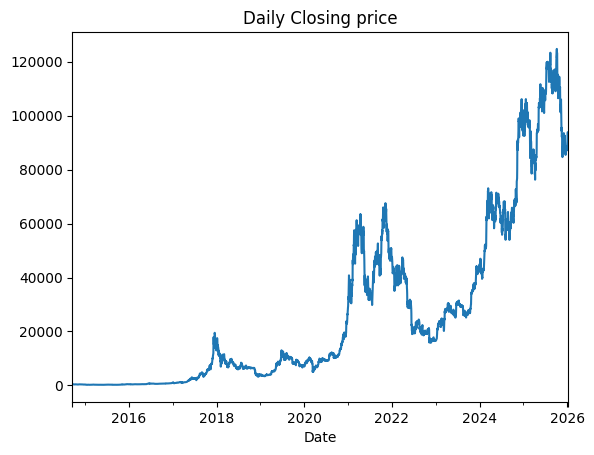

In [9]:
# Visualization

df['y'].plot(title="Daily Closing price")
plt.show()

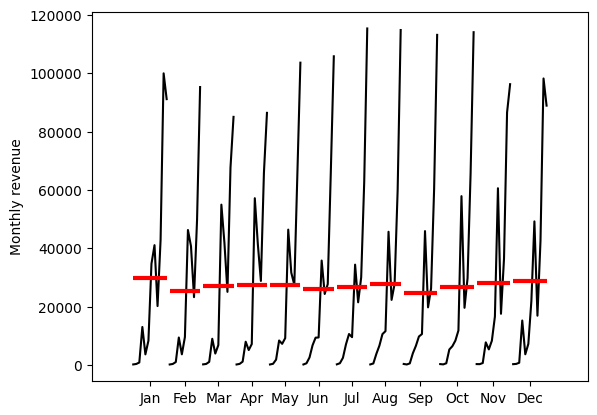

In [10]:
month_plot(df['y'].resample('ME').mean(), ylabel="Monthly revenue")
plt.show()

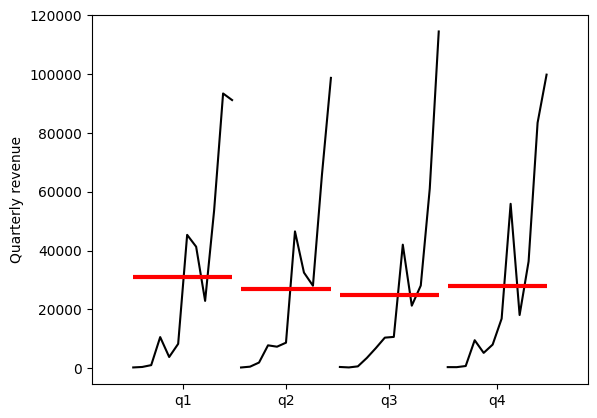

In [11]:
quarter_plot(df['y'].resample('QE').mean(), ylabel="Quarterly revenue")
plt.show()

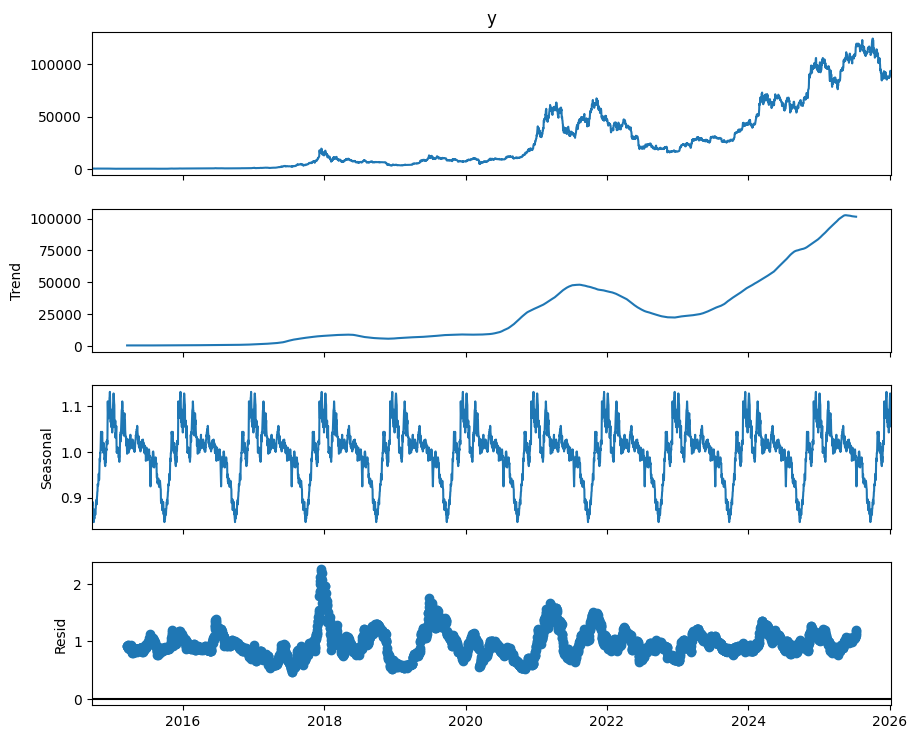

In [13]:
# Seasonal

decomposition = seasonal_decompose(df['y'], model="mul", period=365)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

# Correlations


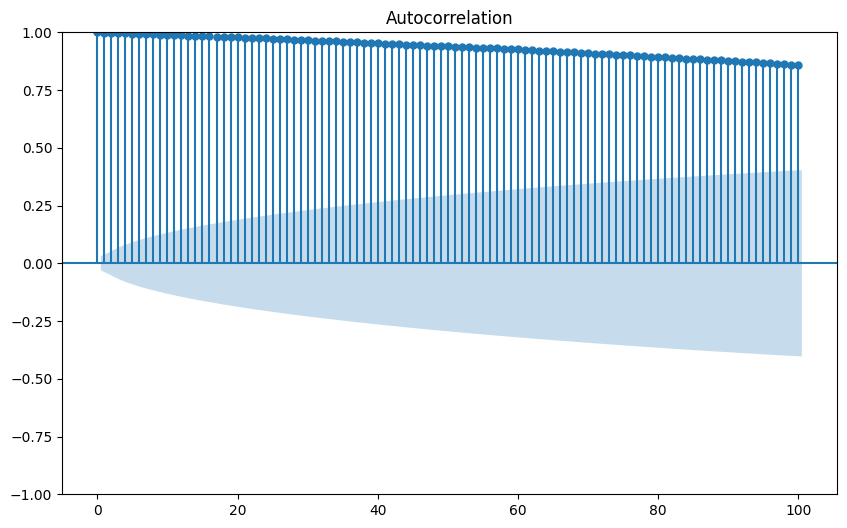

In [14]:
# Auto correlation
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df['y'], lags=100, ax=ax)
plt.show()

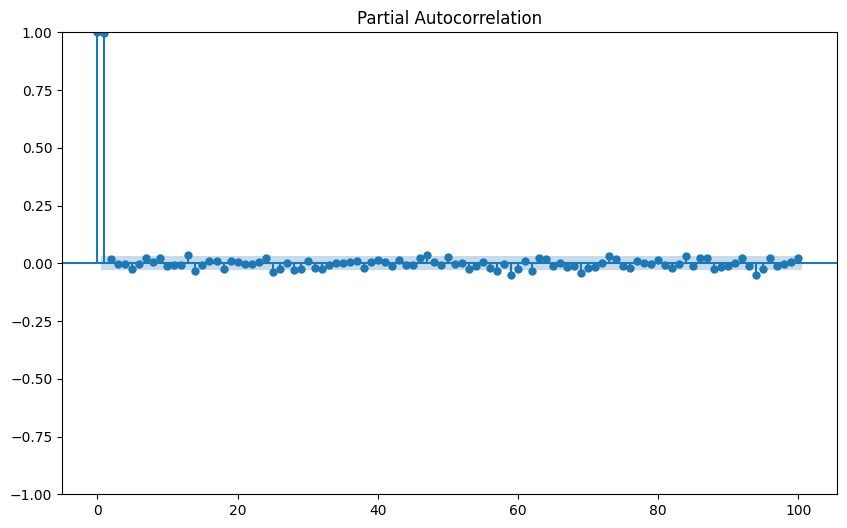

In [15]:
# Auto patial correlation
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(df['y'], lags=100, ax=ax)
plt.show()

# Statistical Properties & Stationarity
- Stationarity Test
- Making Data Stationary

In [16]:
# stationary
def check_stationary(y):
    result = adfuller(y)
    pValue = result[1]
    print(f"P-value = {pValue}")

    if pValue < 0.05:
        print("Stationary")
    else:
        print("Non-stationary")

In [17]:
check_stationary(df['y'])

P-value = 0.8457288950130423
Non-stationary


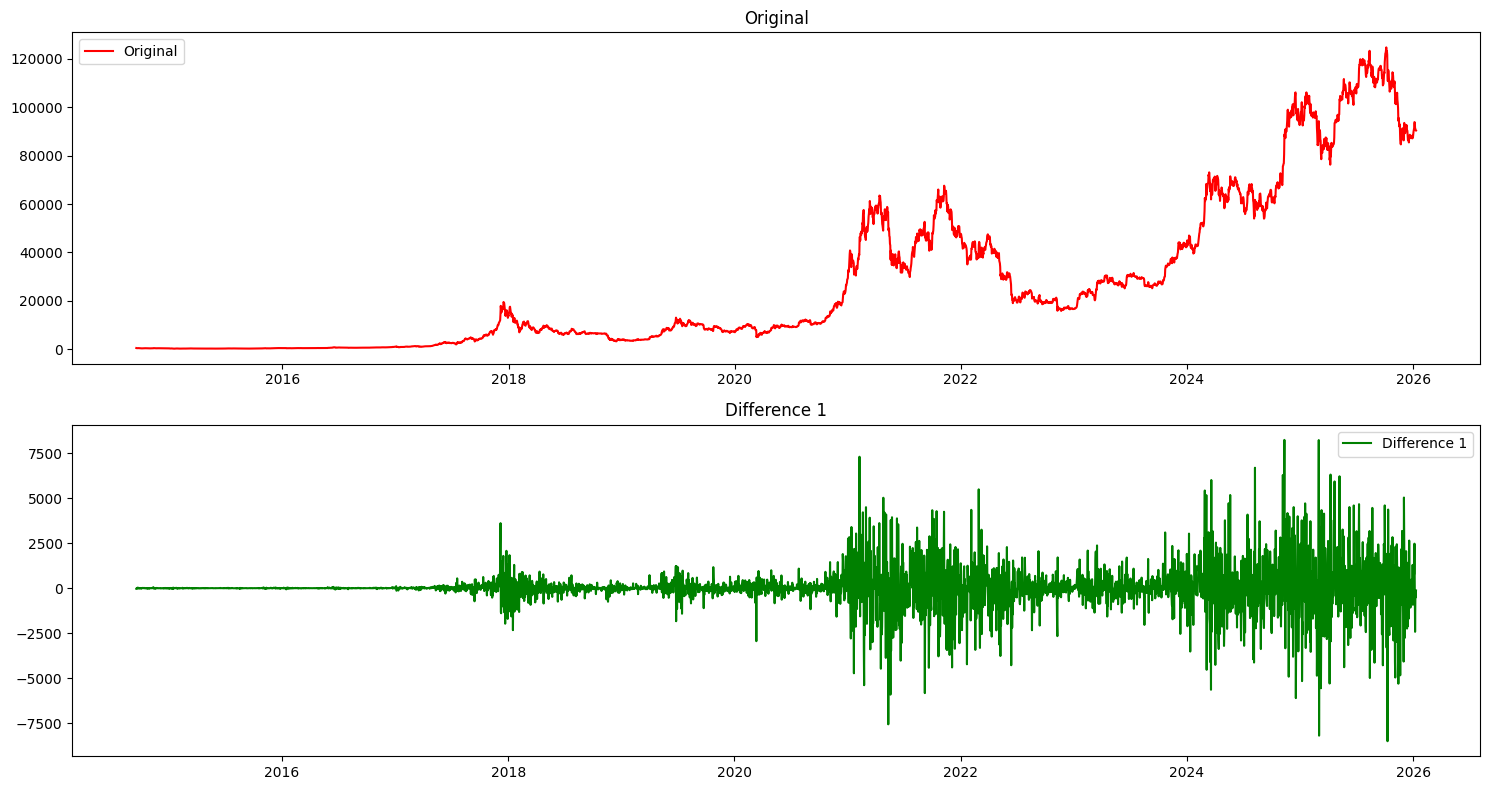

In [18]:
# make stationary
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
fig.suptitle('stationary', fontsize=14, fontweight="bold")

# original
plt.plot(df['y'], label="Original", color='red')
plt.title("Original")
plt.legend()

# Difference 1
plt.subplot(2, 1, 2)
df['diff_1'] = df['y'].diff().dropna()
plt.plot(df['diff_1'], label="Difference 1", color="green")
plt.title("Difference 1")
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
check_stationary(df['diff_1'].dropna())

P-value = 1.5420346328313243e-16
Stationary


In [56]:
# train and test
periods = 50
train, test = df.iloc[:-periods], df.iloc[-periods:]
train.head()

,y,High,Low,Open,Volume,diff_1
Date,,,,,,
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,-32.894012
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,-29.644012
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,14.108002
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,-10.082977
2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600,3.330994


In [57]:
# auto arima to find best parameters
model = auto_arima(train['y'], seasonal=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4083
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -34357.490
Date:                Sun, 11 Jan 2026   AIC                          68718.980
Time:                        22:23:21   BIC                          68731.609
Sample:                    09-18-2014   HQIC                         68723.452
                         - 11-21-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0407      0.008     -4.967      0.000      -0.057      -0.025
sigma2      1.198e+06   1.04e+04    114.852      0.000    1.18e+06    1.22e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20344.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              30.12   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
prediction_model = model.predict(n_periods=len(test))
prediction_model

2025-11-22    85153.427196
2025-11-23    85150.873185
2025-11-24    85150.977154
2025-11-25    85150.972922
2025-11-26    85150.973094
2025-11-27    85150.973087
2025-11-28    85150.973087
2025-11-29    85150.973087
2025-11-30    85150.973087
2025-12-01    85150.973087
2025-12-02    85150.973087
2025-12-03    85150.973087
2025-12-04    85150.973087
2025-12-05    85150.973087
2025-12-06    85150.973087
2025-12-07    85150.973087
2025-12-08    85150.973087
2025-12-09    85150.973087
2025-12-10    85150.973087
2025-12-11    85150.973087
2025-12-12    85150.973087
2025-12-13    85150.973087
2025-12-14    85150.973087
2025-12-15    85150.973087
2025-12-16    85150.973087
2025-12-17    85150.973087
2025-12-18    85150.973087
2025-12-19    85150.973087
2025-12-20    85150.973087
2025-12-21    85150.973087
2025-12-22    85150.973087
2025-12-23    85150.973087
2025-12-24    85150.973087
2025-12-25    85150.973087
2025-12-26    85150.973087
2025-12-27    85150.973087
2025-12-28    85150.973087
2

In [59]:
def model_assessment(train, test, prediction, title):
    plt.figure(figsize=(10, 6))
    plt.plot(train, label="Train")
    plt.plot(test, label="test")
    plt.plot(prediction, label="Forecast")
    plt.legend()
    plt.title(f"Train, test and forecast of {title}")
    plt.show()

    mae = mean_absolute_error(test, prediction)
    rmse = root_mean_squared_error(test, prediction)
    mape = mean_absolute_percentage_error(test, prediction)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f} %")

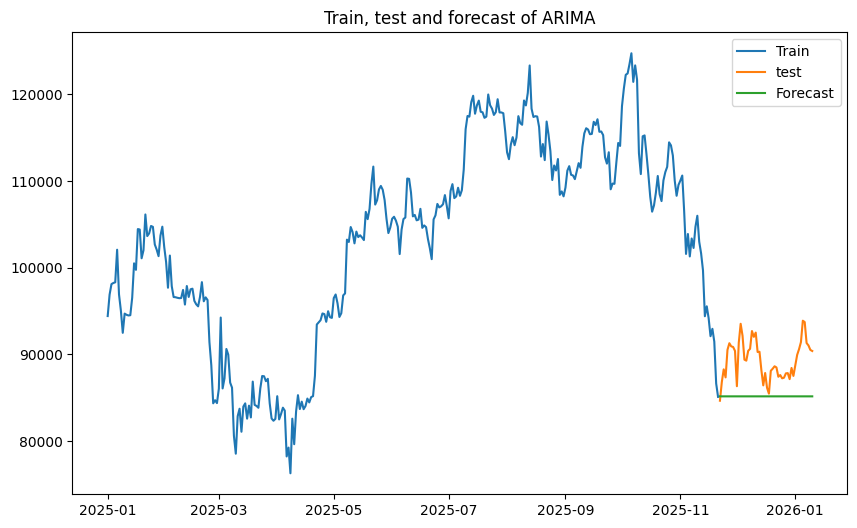

MAE: 4255.12
RMSE: 4772.23
MAPE: 0.05 %


In [60]:
model_assessment(train['y']['2025':], test["y"], prediction_model, "ARIMA")

In [61]:
# sarima
df.columns

Index(['y', 'High', 'Low', 'Open', 'Volume', 'diff_1'], dtype='object')

In [62]:
# Regressor train and test
s_periods = 50
s_train, s_test = df.iloc[:-s_periods, 1:5], df.iloc[-s_periods:, 1:5]
s_test.head()

,High,Low,Open,Volume
Date,,,,
2025-11-22,85503.007812,83490.898438,85098.562500,40793099246
2025-11-23,88038.468750,84641.773438,84648.609375,58083435576
2025-11-24,89206.335938,85272.195312,86798.773438,74433896110
2025-11-25,88457.335938,86131.429688,88269.960938,64837343545
2025-11-26,90581.156250,86316.898438,87345.585938,66496301869


In [63]:
model_sarimax = auto_arima(train['y'], m=7, X=s_train)
model_sarimax.summary()

/home/mano/Manoj/Learning/time_series/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/mano/Manoj/Learning/time_series/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/home/mano/Manoj/Learning/time_series/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/mano/Manoj/Learning/time_series/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4083
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -30696.464
Date:                Sun, 11 Jan 2026   AIC                          61406.928
Time:                        22:24:26   BIC                          61451.131
Sample:                    09-18-2014   HQIC                         61422.581
                         - 11-21-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
High           0.8756   6.16e-05   1.42e+04      0.000       0.875       0.876
Low            0.6562   6.12e-05   1.07e+04      0.000       0.656       0.656
Open          -0.5344   6.12e-05  -8738.579      0.000      -0.535      -0.534
Volume     -7.042e-11   2.17e-10     -0.324      0.746   -4.96e-10    3.56e-10
ar.L1          0.7872   1.86e-07   4.23e+06      0.000       0.787       0.787
ma.L1         -0.8334   1.93e-07  -4.33e+06      0.000      -0.833      -0.833
sigma2      1.992e+05   3.57e-13   5.58e+17      0.000    1.99e+05    1.99e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             35663.58
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              37.77   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+32. Standard errors may be unstable.
"""

In [64]:
prediction_sarimax = model_sarimax.predict(n_periods=len(test), X=s_test)
prediction_sarimax

2025-11-22    84172.768209
2025-11-23    87385.880265
2025-11-24    87670.774338
2025-11-25    86792.332352
2025-11-26    89266.889234
2025-11-27    91199.795879
2025-11-28    91837.053195
2025-11-29    90476.469753
2025-11-30    91287.938321
2025-12-01    85866.224547
2025-12-02    91255.265792
2025-12-03    93283.243735
2025-12-04    92084.435434
2025-12-05    89767.816923
2025-12-06    89628.583567
2025-12-07    90221.611047
2025-12-08    91279.622837
2025-12-09    93169.993455
2025-12-10    93309.777576
2025-12-11    91354.918803
2025-12-12    90508.754568
2025-12-13    90052.545269
2025-12-14    88480.705631
2025-12-15    87637.283259
2025-12-16    87033.819800
2025-12-17    88063.968335
2025-12-18    87650.342547
2025-12-19    88384.007757
2025-12-20    88094.436457
2025-12-21    88224.400452
2025-12-22    89559.326724
2025-12-23    87371.351589
2025-12-24    87000.434513
2025-12-25    87721.580419
2025-12-26    88547.041962
2025-12-27    87490.384538
2025-12-28    87461.432032
2

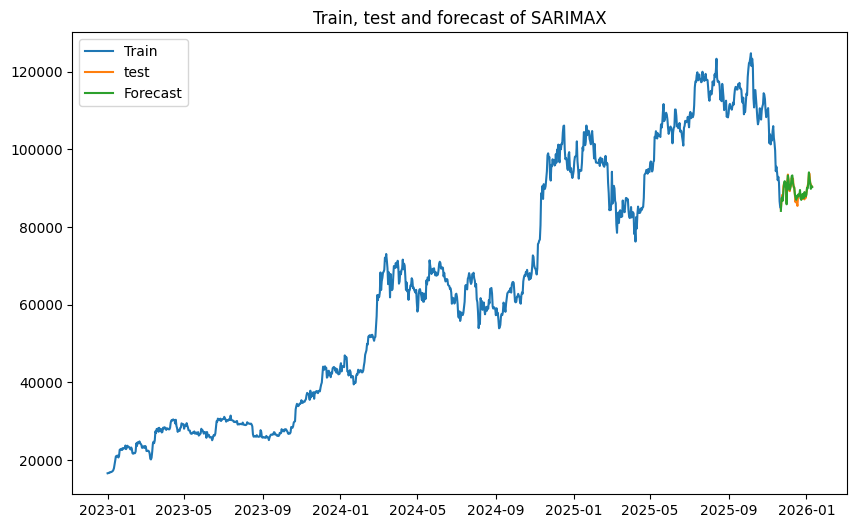

MAE: 596.27
RMSE: 788.65
MAPE: 0.01 %


In [65]:
model_assessment(train['y']['2023':], test['y'], prediction_sarimax, "SARIMAX")

In [66]:
print(f"Train mean: {train['y'].mean()}")
print(f"Test mean: {test['y'].mean()}")

Train mean: 26246.46787854862
Test mean: 89385.933125


In [67]:
# define the model to do cv
model_cv = ARIMA(order=(1, 0, 1), seasonal_order=(0, 0, 0, 0))

In [68]:
cv = model_selection.RollingForecastCV(h=30, step=15, initial=df.shape[0] - 180)

In [69]:
cv_score = model_selection.cross_val_score(model_cv,
                                           y=df['y'],
                                           X=df.iloc[:, 1:5],
                                           scoring='mean_squared_error',
                                           cv=cv,
                                           verbose=1,
                                           error_score=10000000
                                           )

/home/mano/Manoj/Learning/time_series/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mano/Manoj/Learning/time_series/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mano/Manoj/Learning/time_series/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mano/Manoj/Learning/time_series/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

In [70]:
rmse = np.sqrt(np.average(cv_score))
print(f"RMSE: {int(rmse)}")

RMSE: 1074
